<a href="https://colab.research.google.com/github/shajarian/HAR/blob/main/HumanActivityReognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Human Activity Recognition:**
 Build a Convolutional Neural Network (CNN) to classify human activities (e.g., walking, sitting, standing) using the Human Activity Recognition Using Smartphones Data Set from the UC Irvine (UCI) Machine Learning Repository. This project leverages a 1D CNN suitable for time-series data.
 Dataset link: https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!ls "/content/drive/My Drive/Semester 4/ML and Data Mining/Project"

'UCI HAR Dataset.zip'


Dataset Information:
- Name:Human Activity Recognition Using Smartphones Data Set
- Source: UCI Machine Learning Repository
- Description: Records of 30 participants performing activities of daily living while carrying a waist-mounted smartphone with embedded inertial sensors.

The dataset is divided into train and test sets.
   - Each set contains:
     - Inertial Signals: Raw sensor data.
     - X_train.txt / X_test.txt: Preprocessed feature vectors.
     - y_train.txt / y_test.txt: Activity labels.

In [33]:
!unzip -o "/content/drive/My Drive/Semester 4/ML and Data Mining/Project/UCI HAR Dataset.zip" -d "/content/dataset"

Archive:  /content/drive/My Drive/Semester 4/ML and Data Mining/Project/UCI HAR Dataset.zip
  inflating: /content/dataset/UCI HAR Dataset/.DS_Store  
  inflating: /content/dataset/__MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: /content/dataset/UCI HAR Dataset/activity_labels.txt  
  inflating: /content/dataset/__MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: /content/dataset/UCI HAR Dataset/features.txt  
  inflating: /content/dataset/__MACOSX/UCI HAR Dataset/._features.txt  
  inflating: /content/dataset/UCI HAR Dataset/features_info.txt  
  inflating: /content/dataset/__MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: /content/dataset/UCI HAR Dataset/README.txt  
  inflating: /content/dataset/__MACOSX/UCI HAR Dataset/._README.txt  
  inflating: /content/dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
  inflating: /content/dataset/__MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: /content/dataset/UCI HAR 

In [34]:
!pip install tensorflow
import os
import tensorflow as tf

In [35]:
for dirpath, dirnames, filenames in os.walk('/content/dataset'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 2 images in '/content/dataset'.
There are 2 directories and 5 images in '/content/dataset/UCI HAR Dataset'.
There are 1 directories and 3 images in '/content/dataset/UCI HAR Dataset/train'.
There are 0 directories and 9 images in '/content/dataset/UCI HAR Dataset/train/Inertial Signals'.
There are 1 directories and 3 images in '/content/dataset/UCI HAR Dataset/test'.
There are 0 directories and 9 images in '/content/dataset/UCI HAR Dataset/test/Inertial Signals'.
There are 1 directories and 1 images in '/content/dataset/__MACOSX'.
There are 2 directories and 7 images in '/content/dataset/__MACOSX/UCI HAR Dataset'.
There are 1 directories and 4 images in '/content/dataset/__MACOSX/UCI HAR Dataset/train'.
There are 0 directories and 9 images in '/content/dataset/__MACOSX/UCI HAR Dataset/train/Inertial Signals'.
There are 1 directories and 4 images in '/content/dataset/__MACOSX/UCI HAR Dataset/test'.
There are 0 directories and 9 images in '/content/dataset/__M

In [36]:
# Set the path to the dataset and load data
train_dir = '/content/dataset/UCI HAR Dataset/train'

In [37]:
test_dir = '/content/dataset/UCI HAR Dataset/test'

Import Required Libraries:

In [38]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

Load Features and Labels:

In [48]:
X_train = np.loadtxt(train_dir + '/X_train.txt')
y_train = np.loadtxt(train_dir + '/y_train.txt')
X_test = np.loadtxt(test_dir + '/X_test.txt')
y_test = np.loadtxt(test_dir + '/y_test.txt')

Here we need to normalize the dataset before applying CNN:

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1D CNN expects data in the shape (samples, timesteps, features) so we need to reshape our data. Also, we need to convert the labels to categorical format (One-Hot Encode Labels.)

In [46]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [49]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [50]:
# We would like to use part of the training data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

Now we will build our CNN model.

In [51]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(y_train.shape[1], activation='softmax')  # Number of output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We will train our model and save it

In [52]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val)
)

model.save('har_cnn_model.h5')

Epoch 1/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 47s 237ms/step - accuracy: 0.5976 - loss: 1.7112 - val_accuracy: 0.1679 - val_loss: 19.8063
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 81s 232ms/step - accuracy: 0.8505 - loss: 0.3695 - val_accuracy: 0.1693 - val_loss: 10.6386
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 84s 245ms/step - accuracy: 0.9004 - loss: 0.2586 - val_accuracy: 0.8817 - val_loss: 0.2880
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 77s 219ms/step - accuracy: 0.9237 - loss: 0.2051 - val_accuracy: 0.9517 - val_loss: 0.1296
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 221ms/step - accuracy: 0.9234 - loss: 0.1857 - val_accuracy: 0.9579 - val_loss: 0.0866
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 42s 227ms/step - accuracy: 0.9432 - loss: 0.1541 - val_accuracy: 0.9667 - val_loss: 0.0826
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 83s 230ms/step - accuracy: 0.9382 - loss: 0.1478 - val_accuracy: 0.9762 - val_loss: 0.0578
Epoch 8/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 42s 227ms/step - accuracy: 0.9552 - loss:

Evaluate the Model on the Test Set and Generate Predictions:

In [53]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 93.21%


In [54]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step


In [56]:
from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       496
           1       0.91      0.87      0.89       471
           2       1.00      0.86      0.92       420
           3       0.94      0.92      0.93       491
           4       0.94      0.93      0.94       532
           5       0.99      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.94      0.93      0.93      2947
weighted avg       0.94      0.93      0.93      2947



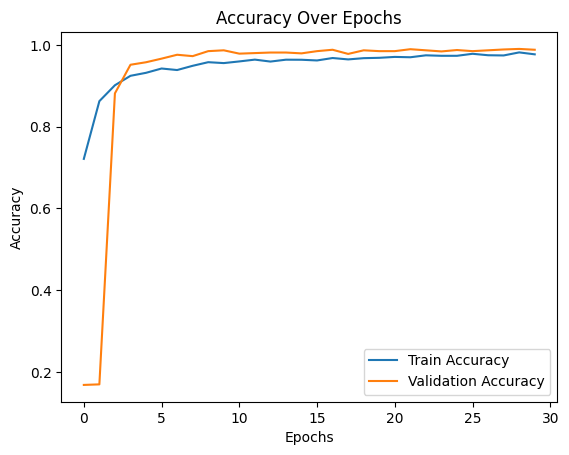

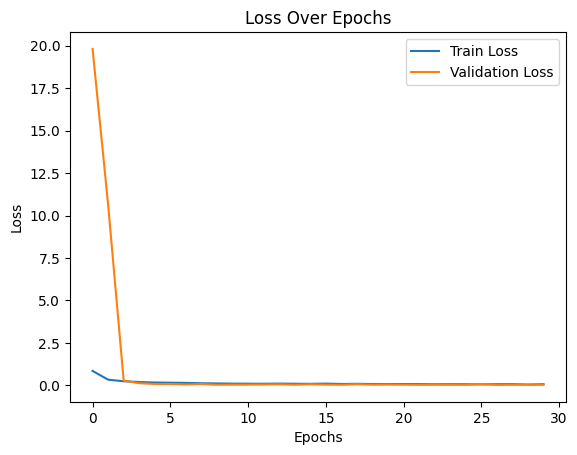

In [58]:
# Accuracy Plot
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


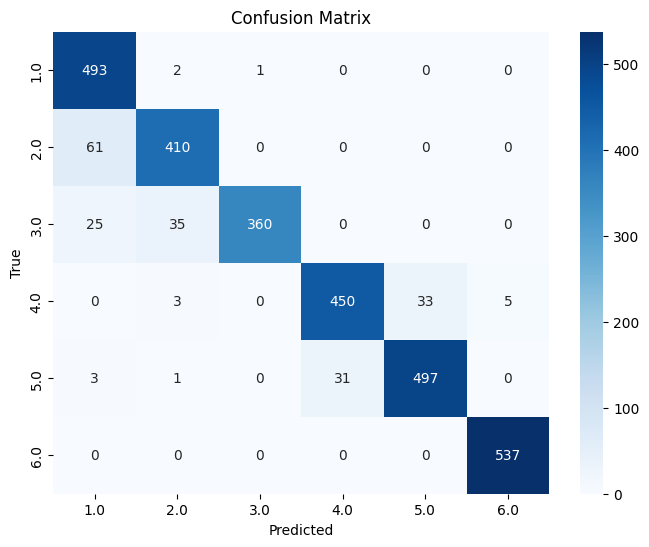

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns  # Optional: Makes the confusion matrix more visually appealing

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

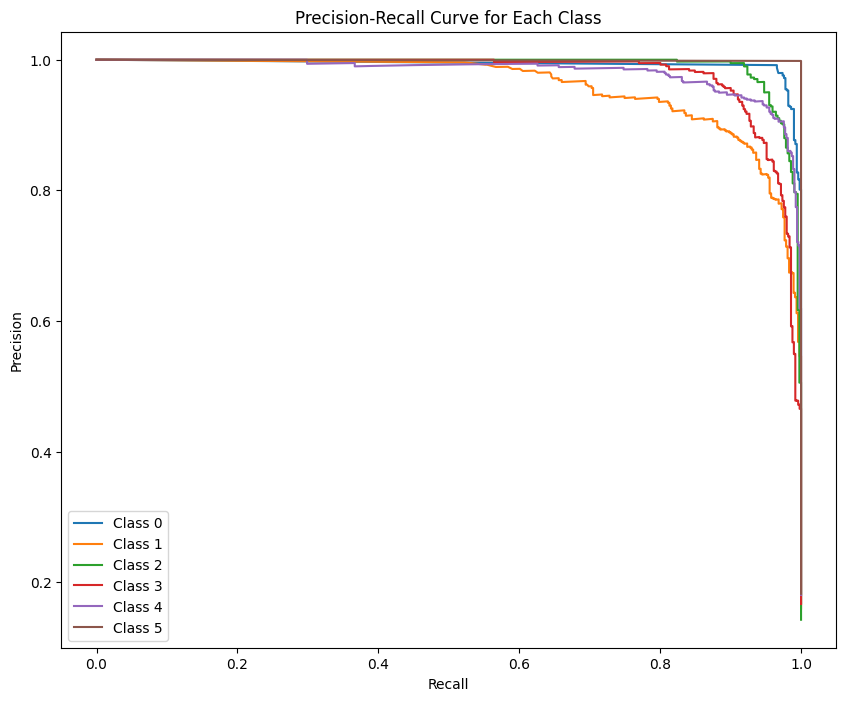

In [60]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))
for i in range(y_test.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title('Precision-Recall Curve for Each Class')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()


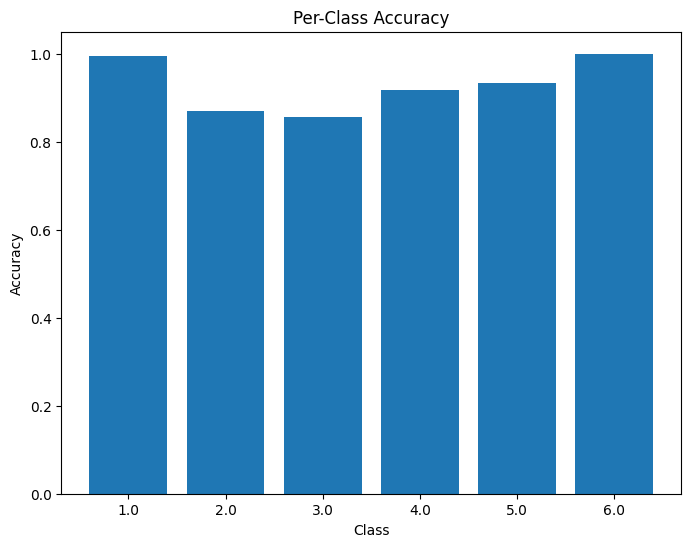

In [61]:
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

plt.figure(figsize=(8, 6))
plt.bar(range(len(class_accuracies)), class_accuracies, tick_label=encoder.classes_)
plt.title('Per-Class Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()


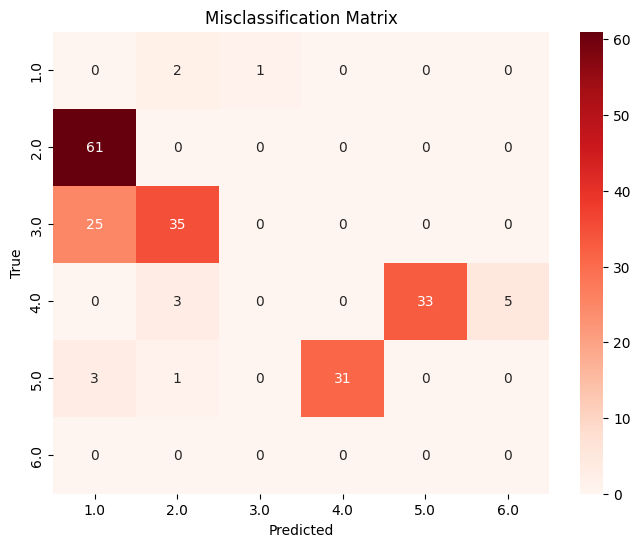

In [62]:
misclassifications = conf_matrix - np.diagflat(conf_matrix.diagonal())

plt.figure(figsize=(8, 6))
sns.heatmap(misclassifications, annot=True, fmt='d', cmap='Reds', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Misclassification Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
